# **DESAFIO 3 G2** 
# **Dataset Imagenes Covid-19 - Modelo de clasificacion supervisado.**
---

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_toc)

Armado y presentacion de dataset

$\hspace{.5cm}$[Importaciones y carga de bibliotecas](#sec_imp)

$\hspace{.5cm}$[Alcance del trabajo y caracteristicas generales](#sec_alcance)

$\hspace{.5cm}$[Analisis previos y observacion de variables](#sec_apo)

$\hspace{.9cm}$[Inspeccion de variables](#sec_apo_ds)

$\hspace{.9cm}$[Caracteristicas generales del dataset](#sec_apo_nc)

Implementacion de modelos de clasificacion supervisados

$\hspace{.5cm}$[Armado de set de entrenamiento y testing](#sec_set)
  
$\hspace{.5cm}$[KNeighborsClassifier](#sec_knn)

$\hspace{.9cm}$[Analisis](#sec_knn_a)

$\hspace{.9cm}$[Optimizacion de hiperparametros mediante GridSearchCV](#sec_knn_gs)

$\hspace{.9cm}$[Metricas y evaluacion del modelo](#sec_knn_eval)

$\hspace{.5cm}$[Gaussian Naive Bayes](#sec_gnb)

$\hspace{.9cm}$[Analisis](#sec_gnb_a)

$\hspace{.9cm}$[Metricas y evaluacion del modelo](#sec_gnb_eval)

$\hspace{.5cm}$[Logistic Regression](#sec_lr)

$\hspace{.9cm}$[Analisis](#sec_lr_a)

$\hspace{.9cm}$[Optimizacion de hiperparametros mediante GridSearchCV](#sec_lr_gs)

$\hspace{.9cm}$[Metricas y evaluacion del modelo](#sec_lr_eval)

Conclusiones

$\hspace{.5cm}$[Conclusiones](#sec_conclusiones)

---

## Armado y presentacion de dataset

<a id="sec_imp"></a> 
### Importaciones y carga de bibliotecas

[volver a TOC](#section_toc)

In [1]:
!pip install opencv-python

#### Importacion de bibliotecas generales

In [2]:
import os
import sys
import re

In [3]:
import pandas as pd
import numpy as np

In [4]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

#### Importacion de librerias para armado y testeo de modelos

In [5]:
# operaciones sobre variables
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, make_scorer
from sklearn.pipeline import Pipeline, make_pipeline, make_union

# modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

# modelos de regresion
from sklearn.linear_model import LinearRegression

# normalizacion de variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

#### Variables globales

In [6]:
# path relativo al repositorio de imagenes
this_path = os.path.dirname('.')
rel_dataset_path = '../../data/xrays_dataset_completo/'

# path absoluto al repositorio de imagenes
abs_dataset_path = os.path.abspath(os.path.join(this_path, rel_dataset_path))

# path absoluto a dataset de training y a dataset testing
# photos1
photos1_dataset_path = os.path.join(abs_dataset_path, "photos1")
# photos2
photos2_dataset_path = os.path.join(abs_dataset_path, "photos2")
# photos3
photos3_dataset_path = os.path.join(abs_dataset_path, "photos3")

# expresion regular para buscar solamente imagenes
pat = '(jpeg|jpg|png)$'
reg = re.compile(pat, flags = re.IGNORECASE)

<a id="sec_apo_ds"></a> 
#### Inspeccion de variables

[volver a TOC](#section_toc)

**Comprobacion de carga de ruta de imagenes desde el sistema operativo**

In [7]:
path_label = [path for path in os.listdir(photos1_dataset_path)]

In [8]:
print(path_label)

['Normal', 'Viral Pneumonia', 'Covid']


#### Inspeccion de imagenes

**Coronavirus**

A continuacion se presentan imagenes de ejemplo de pacientes con Covid-19. Las mismas se utilizaran mas adelante para entrenar los modelos de clasificacion supervisado.

In [9]:
imcor1 = cv2.imread(rel_dataset_path + '/photos1/Covid/0100.jpeg', cv2.COLOR_BGR2GRAY)
imcor2 = cv2.imread(rel_dataset_path + '/photos1/Covid/0102.jpeg', cv2.COLOR_BGR2GRAY)
imcor3 = cv2.imread(rel_dataset_path + '/photos1/Covid/0105.png', cv2.COLOR_BGR2GRAY)
imcor4 = cv2.imread(rel_dataset_path + '/photos1/Covid/0106.jpeg', cv2.COLOR_BGR2GRAY)

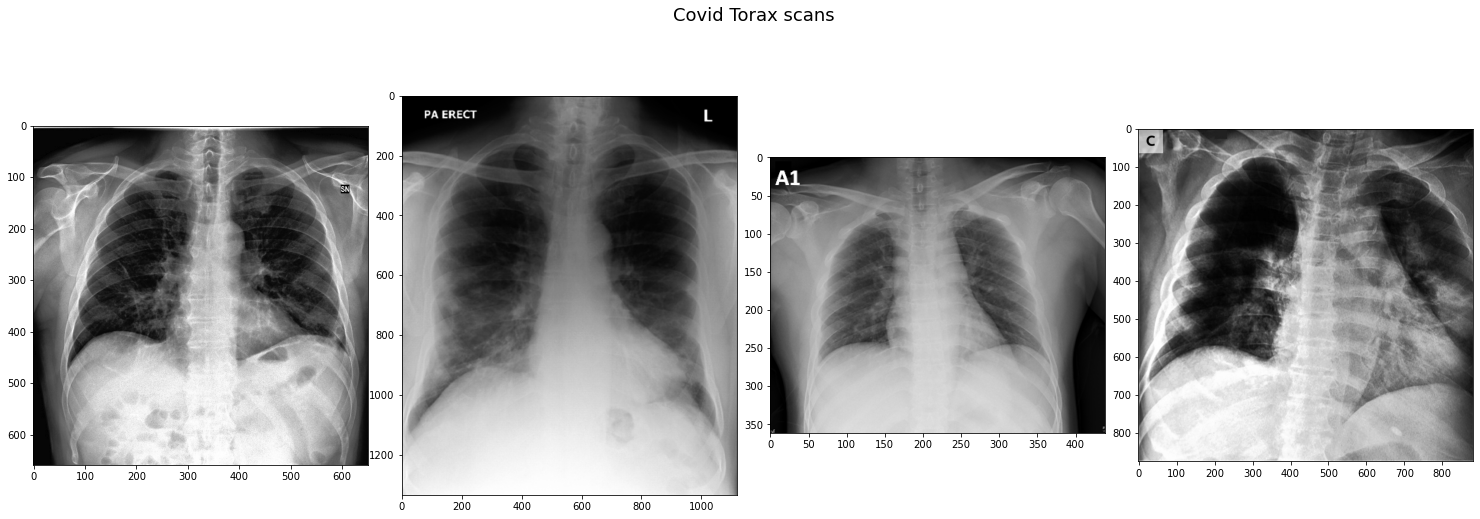

In [10]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Covid Torax scans', y=0.70, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imcor1)
axs[1].imshow(imcor2)
axs[2].imshow(imcor3)
axs[3].imshow(imcor4)
plt.show()

**Neumonia**

A continuacion se presentan imagenes de ejemplo de pacientes con Neumonia. Las mismas se utilizaran mas adelante para entrenar los modelos de clasificacion supervisado.

In [11]:
imneu1 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0101.jpeg', cv2.COLOR_BGR2GRAY)
imneu2 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0102.jpeg', cv2.COLOR_BGR2GRAY)
imneu3 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0103.jpeg', cv2.COLOR_BGR2GRAY)
imneu4 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0104.jpeg', cv2.COLOR_BGR2GRAY)

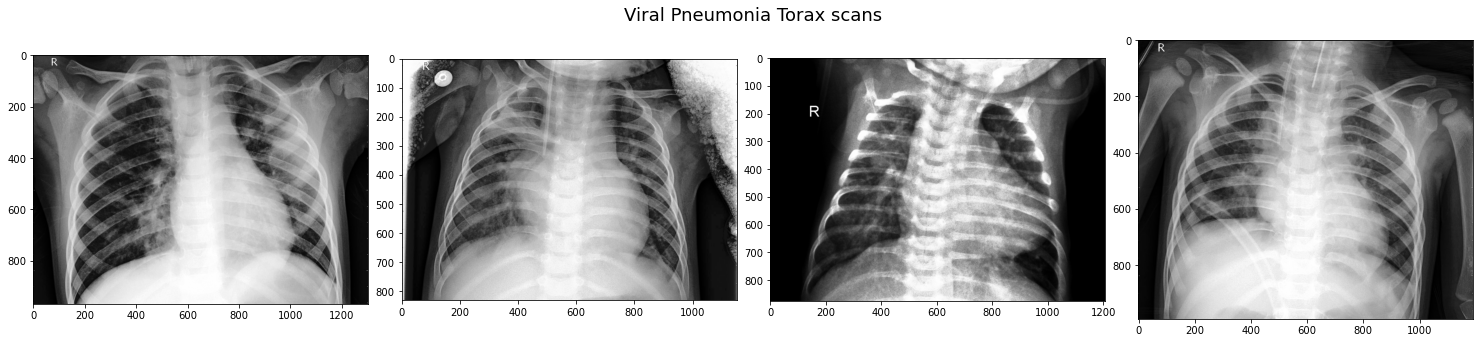

In [12]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Viral Pneumonia Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imneu1)
axs[1].imshow(imneu2)
axs[2].imshow(imneu3)
axs[3].imshow(imneu4)
plt.show()

**Normal**

A continuacion se presentan imagenes sin ninguna afeccion pulmonar. Las mismas se utilizaran mas adelante para entrenar los modelos de clasificacion supervisado.

In [13]:
imnor1 = cv2.imread(rel_dataset_path + '/photos1/Normal/0101.jpeg', cv2.COLOR_BGR2GRAY)
imnor2 = cv2.imread(rel_dataset_path + '/photos1/Normal/0102.jpeg', cv2.COLOR_BGR2GRAY)
imnor3 = cv2.imread(rel_dataset_path + '/photos1/Normal/0103.jpeg', cv2.COLOR_BGR2GRAY)
imnor4 = cv2.imread(rel_dataset_path + '/photos1/Normal/0105.jpeg', cv2.COLOR_BGR2GRAY)

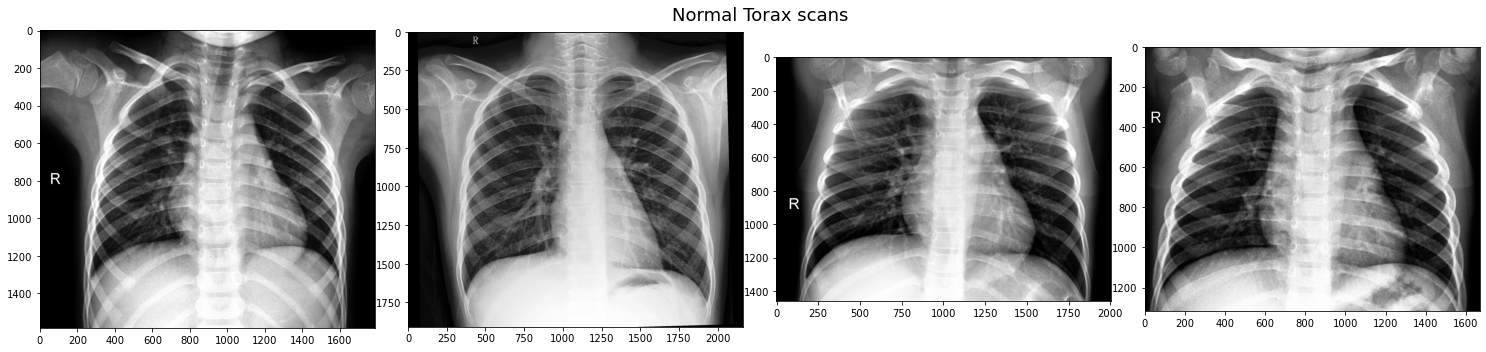

In [14]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Normal Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imnor1)
axs[1].imshow(imnor2)
axs[2].imshow(imnor3)
axs[3].imshow(imnor4)
plt.show()

<a id="sec_apo_ds"></a> 
### Caracteristicas generales del dataset.

[volver a TOC](#section_toc)

**Parametros de tratamiento general sobre las imagenes**

Analisis segun las siguientes condiciones:
   
 * Tamaño de imagenes ajustados a 100 pixeles x 100 pixeles.
 * Uso de escala de grises.
 * Uso de [**Biblioteca OpenCV**](https://opencv.org/)
 
La biblioteca OpenCV permitio facilmente trabajar con el mapa de bits de cada pixel gracias a su integracion con Numpy. A traves de la utilizacion de metodos de OpenCV podemos generar una matriz de np.array con la distribucion de colores de cada pixel.
A traves del metodo `flatten()` de OpenCV es posible transformar la matriz np.array en un vector. 

Entonces cada vector constituira una imangen de 100 x 100 pixeles distribuida en una sola dimension.

**Imagen ejemplo**

In [15]:
imgtest = cv2.imread(rel_dataset_path + '/photos1/Covid/0100.jpeg', cv2.IMREAD_COLOR)

In [16]:
imgtest = cv2.cvtColor(imgtest, cv2.COLOR_BGR2GRAY)

In [17]:
imgtest = cv2.resize(imgtest, (200,200))

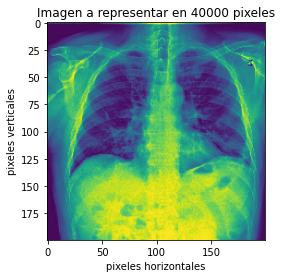

In [18]:
plt.imshow(imgtest)
plt.xlabel('pixeles horizontales')
plt.ylabel('pixeles verticales')
plt.title('Imagen a representar en 40000 pixeles')
plt.show()

In [19]:
imgtest.shape

(200, 200)

In [20]:
imgtest.flatten().shape

(40000,)

**Armado de dataset**

La funcion `new_dataset()` se desarrollo para poder transformar los distintos repositorios de imagenes en una matriz que contenga una lista de vectores correspondiente a cada imagen a analizar.

In [21]:
def new_dataset(dataset_path):
    '''
    creacion de nuevo dataset a partir de repositorio de imagenes
    dataset_path: ruta absoluta donde se encuentran las imagenes, test o train
    salida: tupla con:
        * matriz de dos dimensiones con mapa de bits de cada imagen (cada registro o lista de una dimension es una imagen) - Feature
        * lista de una dimension con valores numericos que representan la clase a la que pertenece la imagen - Target
        * lista de una dimension con las etiquetas de clase a la que pertenece cada imagen
    '''
    imgs_label = []
    imgs = []
    for pathlabel in os.listdir(dataset_path):
        label = os.path.join(dataset_path, pathlabel)
        for file in os.listdir(label):
            if re.search(pat, file) is not None:
                img = cv2.imread(os.path.join(label, file), cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (200,200))
                img = img.flatten()
                imgs.append(img)
                imgs_label.append(pathlabel)
                
    label_to_id_dict = {v:i for i,v in enumerate(np.unique(imgs_label))}
    label_ids = np.array([label_to_id_dict[x] for x in imgs_label])
    
    return np.array(imgs), label_ids, np.array(imgs_label)

### Preparacion del dataset

Unificacion de set de train y testing para aplicar una estrategia de separacion a traves de los metodos de scikit learn. Se busca mantener la proporcionalidad de la clases de la variable target.

In [22]:
photos1_X, photos1_y, photos1_labels = new_dataset(photos1_dataset_path)
photos2_X, photos2_y, photos2_labels = new_dataset(photos2_dataset_path)
photos3_X, photos3_y, photos3_labels = new_dataset(photos3_dataset_path)

**Features**

Matriz que contiene en cada vector la distribucion de colores por pixel de cada imagen.

In [23]:
photos1_X

array([[ 63,  57,  59, ...,   0,   0,   0],
       [ 23,  25,  22, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [254, 180, 178, ..., 110, 103, 105],
       [  6,   6,   7, ...,  12,  12,  16],
       [ 54,  41,  33, ...,  46,  50,  55]], dtype=uint8)

**Target**

Labels que hacen referencia a que clase pertenece cada vector.

Entonces:
 * 0 - Corresponde a los enfermos con COVID: **_Covid_**.
 * 1 - Corresponde a los pacientes saludables: **_Normal_**.
 * 2 - Corresponde a los enfermos con Neumonía: **_Viral Pneumonia_**.

In [24]:
photos1_labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid'], dtype='<U15')

In [25]:
photos1_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Estructura de cada set de imagenes cargado.

In [26]:
display(photos1_X.shape, photos1_y.shape, photos1_labels.shape)
display(photos2_X.shape, photos2_y.shape, photos2_labels.shape)
display(photos3_X.shape, photos3_y.shape, photos3_labels.shape)

(66, 40000)

(66,)

(66,)

(251, 40000)

(251,)

(251,)

(353, 40000)

(353,)

(353,)

**Features y target como objetos de pandas**

La estructura final del dataset de features esta conformado por:

* 670 imagenes estructuradas en vectores.
* 10000 features correspondientes a la escala de colores de cada pixel representado entre 0 a 255.

In [27]:
numpy_append = np.append(photos1_X, photos2_X, axis=0)
data_features = pd.DataFrame(np.append(numpy_append, photos3_X, axis=0))

In [28]:
data_features

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,63,57,59,57,66,61,62,62,65,65,...,3,0,0,0,0,0,0,0,0,0
1,23,25,22,37,38,40,73,98,114,116,...,68,48,16,5,2,0,0,0,0,0
2,0,0,0,0,0,0,0,167,173,205,...,21,21,21,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,36,32,36,...,239,255,255,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,96,103,...,9,9,9,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,16,16,14,9,7,4,5,5,5,3,...,57,50,48,31,2,4,1,4,12,20
666,6,6,7,7,7,7,8,7,7,7,...,8,8,9,10,11,11,11,12,12,16
667,54,41,33,31,29,29,255,251,233,219,...,36,36,37,38,41,40,42,46,50,55
668,252,0,0,0,0,0,0,0,0,1,...,6,1,0,0,0,0,0,0,1,253


**Target**

In [29]:
numpy_append = np.append(photos1_y, photos2_y, axis=0)
data_target = pd.Series(np.append(numpy_append, photos3_y, axis=0))

**Dataset final**

In [30]:
data_features.shape, data_target.shape

((670, 40000), (670,))

---

## Implementacion de modelos de clasificacion supervisados

<a id="sec_set"></a> 
### Armado de set de entrenamiento y testing

[volver a TOC](#section_toc)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, stratify=data_target, random_state=0)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((502, 40000), (168, 40000), (502,), (168,))

In [33]:
y_train.value_counts(normalize=True)

1    0.344622
0    0.342629
2    0.312749
dtype: float64

In [34]:
y_test.value_counts(normalize=True)

1    0.345238
0    0.339286
2    0.315476
dtype: float64

**Escalado de valores**

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train

array([[-0.65065541, -0.66578079, -0.69408337, ...,  1.02444217,
         0.9733585 ,  0.75754596],
       [-0.40195762, -0.40896919, -0.42807737, ..., -0.31654862,
        -0.31130892, -0.33327676],
       [-0.33090111, -0.3906255 , -0.40907695, ..., -0.14010247,
        -0.16655766, -0.19692392],
       ...,
       [ 0.62836178,  0.69165197,  0.69294788, ...,  1.83609449,
         1.7152087 ,  1.62679532],
       [-0.49077826, -0.50068762, -0.52307952, ..., -0.31654862,
        -0.38368455, -0.43554139],
       [-0.65065541, -0.62909342, -0.69408337, ...,  1.81844988,
         2.4570589 ,  1.59270711]])

In [37]:
X_train

array([[-0.65065541, -0.66578079, -0.69408337, ...,  1.02444217,
         0.9733585 ,  0.75754596],
       [-0.40195762, -0.40896919, -0.42807737, ..., -0.31654862,
        -0.31130892, -0.33327676],
       [-0.33090111, -0.3906255 , -0.40907695, ..., -0.14010247,
        -0.16655766, -0.19692392],
       ...,
       [ 0.62836178,  0.69165197,  0.69294788, ...,  1.83609449,
         1.7152087 ,  1.62679532],
       [-0.49077826, -0.50068762, -0.52307952, ..., -0.31654862,
        -0.38368455, -0.43554139],
       [-0.65065541, -0.62909342, -0.69408337, ...,  1.81844988,
         2.4570589 ,  1.59270711]])

In [38]:
# Comprobacion de variables para verificar que la media de cada valor sea cero (0) y el desvio estandar sea uno (1).
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0. -0. -0. ... -0.  0.  0.]
Desvio: [1. 1. 1. ... 1. 1. 1.]


---

### Regresion Logistica

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<a id="sec_lr_a"></a> 
#### Analisis

[volver a TOC](#section_toc)

In [39]:
logistic_regression = LogisticRegression(max_iter= 1000, solver='lbfgs')

logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
logistic_regression.predict_proba(X_train)

array([[9.99991970e-01, 6.19465423e-08, 7.96821295e-06],
       [3.42599450e-04, 9.99652110e-01, 5.29051006e-06],
       [9.99999339e-01, 2.80305517e-07, 3.80353596e-07],
       ...,
       [1.63743531e-04, 9.99634837e-01, 2.01419302e-04],
       [9.99994786e-01, 4.20477344e-09, 5.21012385e-06],
       [1.00000000e+00, 1.18060792e-18, 4.10005794e-12]])

(0.0, 45308.09095173328)

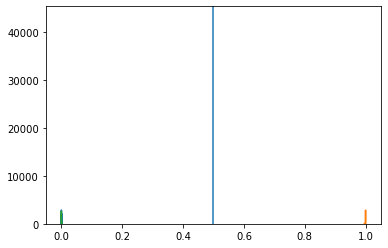

In [41]:
sns.distplot(logistic_regression.predict_proba(X_train[y_train==0])[:,1])
sns.distplot(logistic_regression.predict_proba(X_train[y_train==1])[:,1])
sns.distplot(logistic_regression.predict_proba(X_train[y_train==2])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)

**Classification Report**

<a id="sec_lr_gs"></a> 
#### Optimizacion de hiperparametros mediante GridSearchCV

[volver a TOC](#section_toc)

**Stratified K-Folds**

Utilizacion de separacion en _folds_ los registros del dataset de training para utilizar en una estrategia de cross validation.
Los _folds_ utilizan features estadarizados previamente y permiten preservar el porcentaje de muestras para cada clase.

In [42]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [43]:
#Hiperparametros del modelo.
c = [100000]
solver =  ['newton-cg']
m_iter = [1000]

# Metricas de evaluacion
scoring = ['accuracy']

In [44]:
logreg=LogisticRegression()

In [45]:
logreg_grid = dict(max_iter=m_iter, solver=solver, C=c)
print(logreg_grid)

{'max_iter': [1000], 'solver': ['newton-cg'], 'C': [100000]}


Creacion de la grilla de hiperparametros del modelo

In [46]:
logreg_cv = GridSearchCV(logreg, logreg_grid, refit='accuracy', n_jobs = -1, cv=skf, return_train_score=True, scoring=scoring)

In [47]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100000], 'max_iter': [1000],
                         'solver': ['newton-cg']},
             refit='accuracy', return_train_score=True, scoring=['accuracy'])

In [48]:
logreg_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_max_iter', 'param_solver', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy'])

In [49]:
logreg_cv_results = pd.DataFrame(logreg_cv.cv_results_)
pd.DataFrame(logreg_cv.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,13.877991,1.183616,0.01271,0.003439,100000,1000,newton-cg,"{'C': 100000, 'max_iter': 1000, 'solver': 'new...",0.930693,0.940594,...,0.940257,0.00611,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [50]:
logreg_cv_results.shape

(1, 23)

In [51]:
print(logreg_cv.best_estimator_)
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

LogisticRegression(C=100000, max_iter=1000, solver='newton-cg')
0.9402574257425742
{'C': 100000, 'max_iter': 1000, 'solver': 'newton-cg'}


<a id="sec_lr_eval"></a> 
#### Metricas y evaluacion del modelo

[volver a TOC](#section_toc)

In [52]:
y_test_pred = logistic_regression.predict(X_test)

**Matriz de confusion**

In [53]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[57,  0,  0],
       [ 1, 50,  7],
       [ 0,  2, 51]])

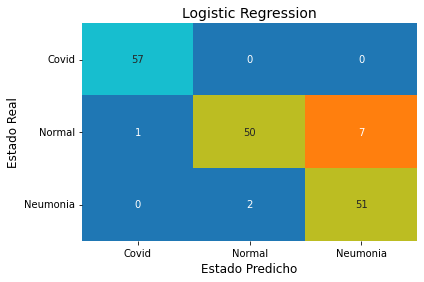

In [54]:
xticks=['Covid','Normal', 'Neumonia']
yticks=['Covid','Normal', 'Neumonia']

sns.heatmap(cm, annot=True, xticklabels=xticks, yticklabels=yticks, cbar=False, fmt='.0f', cmap="tab10")

plt.yticks(rotation=0, fontsize="10", va="center")
plt.title('Logistic Regression', fontsize = 14)
plt.ylabel('Estado Real', fontsize = 12)
plt.xlabel('Estado Predicho', fontsize = 12)

plt.show()

**Classification Report**

In [55]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.96      0.86      0.91        58
           2       0.88      0.96      0.92        53

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



**Metricas**

Asigamos variable a la matriz de confusión

In [56]:
TP = cm [2, 2]  # hemos predicho correctamente que el paciente está sano
TN = cm [0, 0]+cm [2, 2] # hemos predicho correctamente que el paciente está enfermo
FP = cm [0, 1]+cm [2, 1]+cm [0, 2] # hemos predicho que le paciente esta sano pero esta enfermo o confundido la enfermedad
FN = cm [1, 0]+cm [1, 2]+cm [2, 0] # hemos predicho que le paciente esta enfermo pero esta sano o confundido la enfermedad

**Accuracy**

(TP + TN) / (TP + TN + FP + FN)

In [57]:
accuracy_lr = accuracy_score(y_test, y_test_pred).round(2)
print('Accuracy=', accuracy_score(y_test, y_test_pred).round(2)*100,'%')

Accuracy= 94.0 %


**Sensitivity (o recall)**

TP / TP + FN

In [58]:
recall_lr = (TP / (TP + FN)).round(2)
print('recall=', (TP / (TP + FN)).round(2)*100,'%')

recall= 86.0 %


**Specificity**

TN / (TN + FP)

In [59]:
specificity_lr = (TN / (TN + FP)).round(2)
print('Specificity=', (TN / (TN + FP)).round(2)*100,'%')

Specificity= 98.0 %


**Precision**

TP / (TP + FP)

In [60]:
precision_lr = (TP / (TP + FP)).round(2)
print('Precision=', (TP / (TP + FP)).round(2)*100,'%')

Precision= 96.0 %


**False positive rate (FPR)**

(1 - Specificity)

In [61]:
fpr_lr = (1 - (TN / (TN + FP))).round(2)
print('FPR=',100 - ((TN / (TN + FP))).round(2) * 100,'%')

FPR= 2.0 %


**F1-Score**

2*(Precision * Recall) / precision + Recall

In [62]:
f1s_lr = 2*((precision_lr * recall_lr) / (precision_lr + recall_lr)).round(2)
print ('F1-Score=', 2*((precision_lr * recall_lr) / (precision_lr + recall_lr)).round(2)*100,'%')

F1-Score= 90.0 %


*Conclusión:*  vemos que logramos aumentar los indicadores.   

* Tenemos un porcentaje alto de casos que han sido clasificados correctamente (**Accuracy**)
* nuestro modelo está teniendo un alto rendimiento para detectar pacientes sanos en relación a las que realmente estan sanos (**Sensitivity**)
* El modelo es muy específico, cometió pocos errores de falsos positivos (**Specificity**)
* Es muy preciso. De cada 100 predicciones positivas que realiza el modelo (es decir, predice que un paciente este sano), acierta un porcentaje muy alto (**Precision**).
* Logramos bajar la cantidad de casos clasificados como sanos cuando estan enfermos, a la mitad (**False positive rate**)

---

<a id="sec_conclusiones"></a> 
## Conclusiones

[volver a TOC](#section_toc)

In [63]:
imgej = cv2.imread('../data/7.jpg', cv2.IMREAD_COLOR)

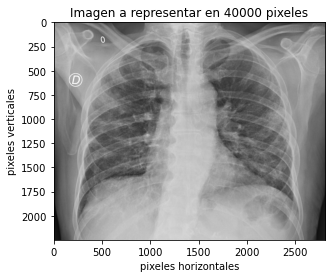

In [64]:
plt.imshow(imgej)
plt.xlabel('pixeles horizontales')
plt.ylabel('pixeles verticales')
plt.title('Imagen a representar en 40000 pixeles')
plt.show()

In [65]:
imgej = cv2.cvtColor(imgej, cv2.COLOR_BGR2GRAY)

In [66]:
imgej = cv2.resize(imgej, (200,200))

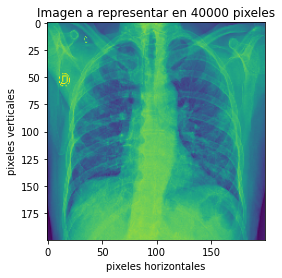

In [67]:
plt.imshow(imgej)
plt.xlabel('pixeles horizontales')
plt.ylabel('pixeles verticales')
plt.title('Imagen a representar en 40000 pixeles')
plt.show()

In [68]:
imgej.shape

(200, 200)

In [69]:
imgej = imgej.flatten()

In [70]:
imgej.shape

(40000,)

In [71]:
imgej

array([137, 135, 147, ...,  27,  28,  30], dtype=uint8)

In [72]:
imgejdf = pd.DataFrame(imgej).T

In [73]:
imgejdf

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,137,135,147,152,149,151,155,154,172,147,...,61,48,36,17,19,22,25,27,28,30


In [74]:
y_imgej_pred = logistic_regression.predict(imgejdf)

In [75]:
y_imgej_pred

array([0])

In [76]:
y_imgej_pred_proba =logistic_regression.predict_proba(imgejdf)

In [77]:
np.round(y_imgej_pred_proba)

array([[1., 0., 0.]])

---

In [78]:
from lime.lime_tabular import LimeTabularExplainer

In [79]:
X_train_explainer = np.array(X_train)
type(X_train_explainer)

numpy.ndarray

In [80]:
X_train_explainer.shape

(502, 40000)

In [81]:
#explainer = LimeTabularExplainer(X_train_explainer, 
#                                 mode = "classification",
#                                 training_labels = y_train,
#                                 feature_names = data_features.columns,
#                                 discretize_continuous=True, 
#                                 discretizer = 'decile')

In [82]:
# necesito que sea un np array:
#data_row = imgej
#explanation = explainer.explain_instance(data_row, logistic_regression.predict_proba, num_features=100)

In [83]:
#explanation.show_in_notebook(show_table=True)

In [84]:
!pip install scikit-image

In [85]:
imgej2 = cv2.imread('../data/7.jpg', cv2.IMREAD_COLOR)

In [86]:
#imgej2 = cv2.cvtColor(imgej2, cv2.COLOR_BGR2GRAY)

In [87]:
imgej2 = cv2.resize(imgej2, (200,200))

In [88]:
import numpy as np
import skimage
import skimage.io
import skimage.transform

In [89]:
## biblioteca skimage

# trabajo basico pixeles imagenes

(2249, 2809, 3)
(2249, 2809)


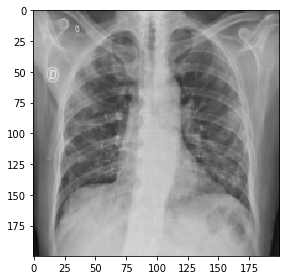

In [90]:
#### cargo imagen
# imagen a color x defecto: np array de 3 dimensiones: (row/x/heigh,column/y/lengh,z/depth/RGB channels)
Xi = skimage.io.imread('../data/7.jpg')
print(Xi.shape)

# one channel only. 2 dimension array
Xi = skimage.color.rgb2gray(Xi)
print(Xi.shape)
display(skimage.io.imshow(Xi))

# resize 2 dimensional array
Xi = skimage.transform.resize(Xi, (200,200))
display(skimage.io.imshow(Xi))

200

200

array([0.54182065, 0.54922524, 0.56438447, ..., 0.10573349, 0.11229792,
       0.11536294])

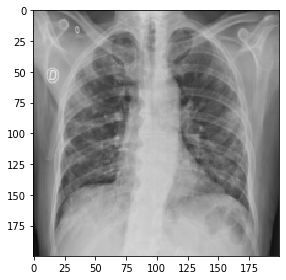

In [91]:
## extraigo tamaño filas y columnas con np.shape
rows,cols = Xi.shape
# calculo longitud total para armar 1 dimension y aplico np.reshape
img_size = rows*cols
img_1D_vector = Xi.reshape(img_size)
display(rows,cols)
display(img_1D_vector)

# recupero 2 dimensiones concatenando filas y columnas para re armar el array
Xj = img_1D_vector.reshape(rows,cols)
skimage.io.imshow(Xj)

In [92]:
#Generate segmentation for image
# NO USO QUICKSHIFT Y USO SLIC BASADO EN K MEANS porque trabaja con imagenes de 2 dimensiones como utilizamos nosotros.
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

# analizar los parametros. Ni idea que hacen. compactness permite que los superpixeles no sean cuadrados perfectos y no termine siendo una grilla.
import skimage.segmentation
superpixels = skimage.segmentation.slic(Xj, n_segments=100, compactness=0.2, sigma=1, start_label=1)

In [93]:
display(superpixels.shape)
display(superpixels)

(200, 200)

array([[ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       ...,
       [91, 91, 91, ..., 92, 92, 92],
       [91, 91, 91, ..., 92, 92, 92],
       [91, 91, 91, ..., 92, 92, 92]])

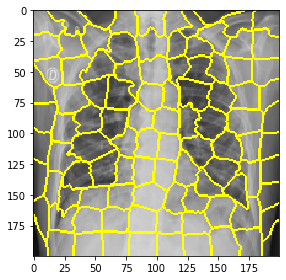

In [94]:
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xj, superpixels))

In [95]:
display((np.ones(np.unique(superpixels).shape[0])[np.newaxis,:]).shape)
superpixels.shape

(1, 100)

(200, 200)

In [96]:
#Generate perturbations
num_perturb = 150 # numero de perturbaciones
trial_prob = 0.5 # probabilidad de cada intento
times_test = 1 # cantidad de intentos

perturbations = np.random.binomial(times_test, trial_prob, size=(num_perturb, num_superpixels))
perturbations

array([[0, 1, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 0]])

In [97]:
display(perturbations[0]) # tomo la primera linea de permutaciones
display(np.sum(perturbations[0] == 1)) # tomo aquellos valores de la primera linea de permutaciones que sean 1 y valculo cuantos valores son
display(len(np.where(perturbations[0] == 1)[0])) # aplico funcion where para cambiar valores y verifico que sea la misma cantidad que los valores 1
np.where(perturbations[0] == 1)[0]

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

45

45

array([ 1,  2,  3,  4,  5, 11, 16, 18, 19, 20, 24, 25, 27, 28, 32, 35, 37,
       38, 40, 43, 44, 49, 50, 52, 56, 59, 61, 63, 65, 67, 70, 71, 72, 76,
       77, 80, 81, 82, 83, 87, 89, 90, 91, 94, 99])

In [98]:
display(superpixels.shape)
display(superpixels)
display(np.zeros(superpixels.shape))

(200, 200)

array([[ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       ...,
       [91, 91, 91, ..., 92, 92, 92],
       [91, 91, 91, ..., 92, 92, 92],
       [91, 91, 91, ..., 92, 92, 92]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
array = np.arange(0,15)
array[:,np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

[0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1]
[[0.54182065 0.54922524 0.56438447 ... 0.         0.         0.        ]
 [0.5738706  0.56720388 0.57335774 ... 0.         0.         0.        ]
 [0.59049257 0.57897598 0.58852768 ... 0.         0.         0.        ]
 ...
 [0.09645288 0.08822069 0.07802692 ... 0.         0.         0.        ]
 [0.0973647  0.08985621 0.08045437 ... 0.         0.         0.        ]
 [0.09829339 0.09051165 0.08151493 ... 0.         0.         0.        ]]


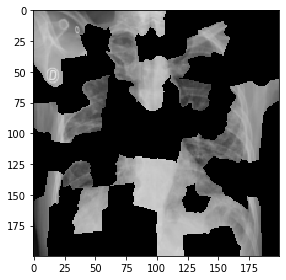

In [100]:
#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(Xi,perturbations[0],superpixels))
print((perturb_image(Xi,perturbations[0],superpixels)))

In [101]:
perturbed_img = perturb_image(Xi,perturbations[0],superpixels)
print(perturbed_img.reshape(rows*cols).shape)
perturbed_img.reshape(rows*cols).reshape(1,-1)

(40000,)


array([[0.54182065, 0.54922524, 0.56438447, ..., 0.        , 0.        ,
        0.        ]])

In [102]:
## se arma una lista con las predicciones. 
# no usamos metodos de redes neuronales, sino regresion logistica, por eso el input tiene que ser una Serie de Panda o un np array de dos dimensiones.
# como partimos de un vector falseamos la 2da dimension mediante .reshape(1,-1)

predictions = []
for pert in perturbations:
    perturbed_img = perturb_image(Xi,pert,superpixels)
    rows,cols = perturbed_img.shape
    perturbed_img_1d = perturbed_img.reshape(rows*cols)
    pred = logistic_regression.predict(perturbed_img_1d.reshape(1,-1))
    predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)
print(predictions[0:5])

(150, 1)
[[0]
 [1]
 [1]
 [0]
 [0]]


https://towardsdatascience.com/interpretable-machine-learning-for-image-classification-with-lime-ea947e82ca13

In [103]:
type(num_superpixels)

int

In [104]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)
print(distances[0:10])

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)
print(weights[0:10])

(150,)
[0.32917961 0.27888974 0.3        0.26515308 0.35968758 0.27198901
 0.3        0.23842269 0.34425615 0.31443454]
(150,)
[0.42026336 0.53674298 0.48675226 0.56981175 0.35522595 0.55331702
 0.48675226 0.63459833 0.38747716 0.45341265]


In [105]:
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions, sample_weight=weights)
coeff = simpler_model.coef_[0]
#coeff

In [106]:
num_top_features = 20
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([73,  2, 22, 60,  0, 81, 37, 48, 84, 94, 61, 17, 51, 72, 20, 41, 13,
       69,  3,  4])

In [107]:
## no da siempre lo mismo ¿¿por qué??
## sera porque las perturbaciones siempre son diferentes ??

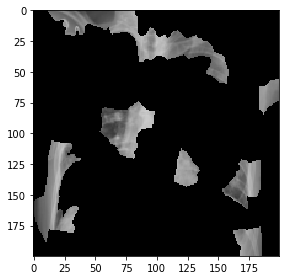

In [108]:
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi,mask,superpixels) )

In [109]:
# alternativa - usar directamente metodos de libreria lime
# https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html
# https://www.inovex.de/blog/lime-machine-learning-interpretability/
# https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb

In [110]:
# Estudio de metodos de generacion de superpixeles
# https://arxiv.org/pdf/1910.07856.pdf

In [111]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [112]:
explainer = lime_image.LimeImageExplainer()
 
explanation = explainer.explain_instance(
    image=Xj, 
    classifier_fn=predict_fn, 
    top_labels=1, 
    hide_color=0, 
    num_features=20, 
    num_samples=500)

NameError: name 'predict_fn' is not defined

In [ ]:
masked_image, boundaries = explanation.get_image_and_mask(
    label=336, 
    positive_only=True, 
    num_features=6, 
    hide_rest=True)
 
plt.imshow(mark_boundaries(masked_image / 2 + 0.5, boundaries))